# **SVM - Kernel comparison**

## Kernel interpretation

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
#PIL(pillow) python-image-library, se usará para guardar un archivo
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
#Otro generador de datos isotropicos

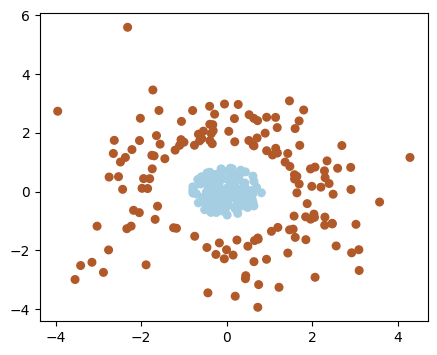

In [26]:
X, y = make_gaussian_quantiles(cov=2,
                                 n_samples = 300 , n_features = 2 ,
                                 n_classes = 2 , random_state = 1)
X [y == 0] = X[y == 0] *0.5


_, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:,0], X[:,1], c=y, s=30, cmap='Paired')

In [27]:
#funcion Exponencial para clasificador kernel
Xk = X[:,0]**2 + X[:,1]**2
print(Xk.shape)

# #funcion lineal no es adecuada para hacer la separacion de este clasificador
# Xk = X[:,0] + X[:,1]
# print(Xk.shape)

(300,)


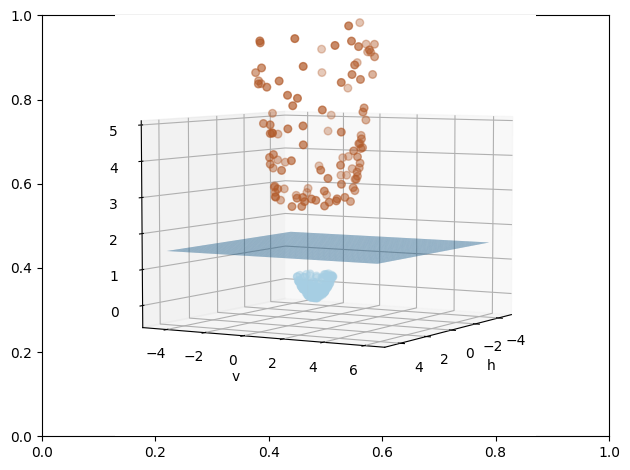

In [16]:
f, _ = plt.subplots()
ax = f.add_subplot(projection='3d')
ax.view_init(5,30) # son grados, el primer parametro rota el eje x (ver desde arriba), el segundo el eje y (como dar una vuelta de pie)
ax.scatter3D( X[:,0] , X[:,1] , Xk , c = y , s=30, cmap='Paired')
ax.set_zlim(-0.5,5)

h_grid, v_grid = np.meshgrid(np.linspace(-4.5,4.5,100), np.linspace(-4.5,6.2,100))
z_grid = np.ones(h_grid.shape) * 1.5 #El 1.5 es donde se ubica en z ese arrego de 1 "el hiperplano"


ax.plot_surface(h_grid,v_grid, z_grid, alpha = 0.5) #graficando la superficie
ax.set_xlabel('h'), ax.set_ylabel('v')
ax.set_zlim(-0.5,5)
plt.tight_layout()

In [5]:
# Sve all figs
import os
os.makedirs('imgs/', exist_ok = True) #Creando una carpeta para guardar las imagenes
#el parametro es para que no salga error por si la carpeta ya existe

for angle in range(0,91,2):
  f, _ = plt.subplots()
  ax = f.add_subplot(projection = '3d')
  ax.view_init(angle, 30)
  ax.scatter3D(X[:,0], X[:,1], Xk, c= y, s= 30, cmap='Paired')
  ax.plot_surface(h_grid,v_grid, z_grid, alpha = 0.5)
  ax.set_xlabel('h'), ax.set_ylabel('v'), ax.set_zlabel('k')
  ax.set_zlim(0,5) #límites del eje z
  plt.savefig('imgs/{0}.png'.format(angle), dpi=200) #para guardar los plots como imagen
  plt.clf(), plt.close() #Elimina el eje para que no se sobrescriba y la otra lo cierra

In [6]:
import os
from PIL import Image
from natsort import natsorted, ns

images = []
files_ = natsorted(os.listdir('/content/imgs'), alg = ns.PATH) #creando la lista de archivos "os.listdir('/content/imgs')"" me devuelve la lista de los archivos en ese directorio, (alg = ns.PATH) el algoritmo de ordenamiento es
print(len(files_))
# Save a gif
for img in files_:
  image = Image.open('imgs/{0}'.format(img)) #abriendo la imagen
  images.append(image)

image.save("kernel_.gif", save_all=True, append_images=images, duration=200, loop=0)

46


## SVM

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification #ace datos isotropicos

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#importamos la funcion
import sys
sys.path.append('/content/drive/MyDrive/Machine Learning/machine_learning/Tools/')
from fucboundaries import Boundaries

In [15]:
# we create 100 separable points

#NO LOS USAMOS EN CLASE, SIMPLEMENTE SEGUIMOS CON LOS ANTERIORES

# X, Y = make_classification(n_samples = _ , n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2, random_state=2)
# plt.scatter( _ , _ , c = _ , s = _, cmap=plt.cm.Paired)

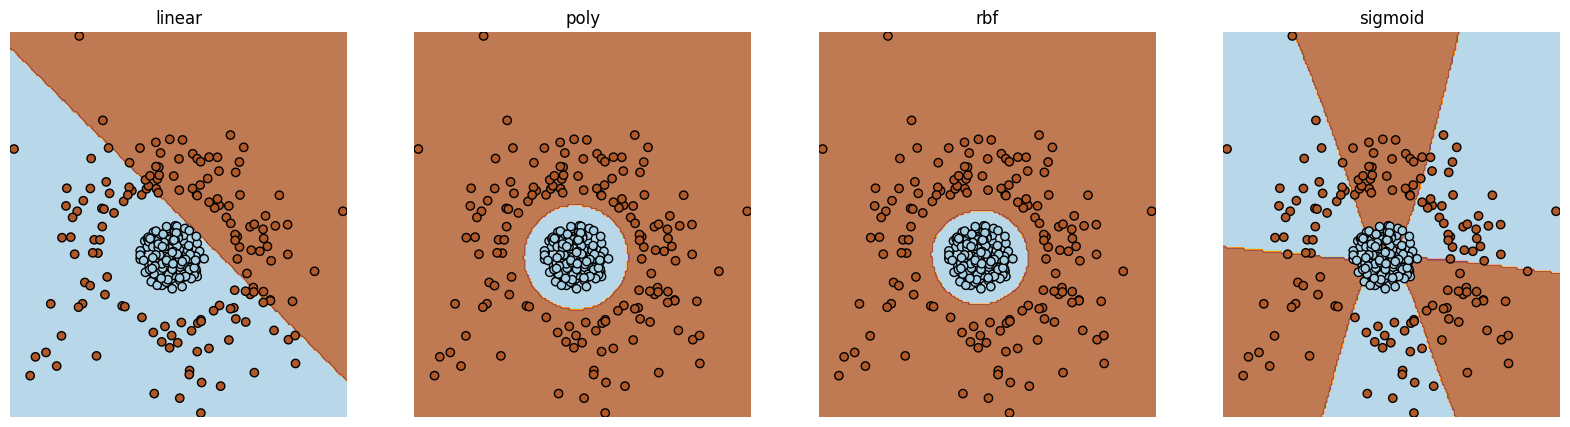

In [33]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] #son 4 fronteras de desición

_, axes = plt.subplots(1,4, figsize = (20,5)) #4 gráficas

# fit the model
for i,kernel in enumerate(kernels) :

  clf = SVC(kernel = kernel , gamma = 1, degree = 2)
  clf.fit( X , y )

  Boundaries(clf, X, y, ax=axes[i])
  axes[i].set_title(kernel)
  axes[i].set_axis_off()
plt.show()


Create a function that plots the decision boundaries of a given SVM

## In real data

Evaluate the different SVM kernels in the Iris and Fruits datasets

In [34]:
from sklearn.datasets import load_iris # Iris dataset
import pandas as pd

In [35]:
iris = load_iris() # Load the iris dataset
X = iris.data[:,0:2] # Features. We'll pick 2
y = iris.target # Labels

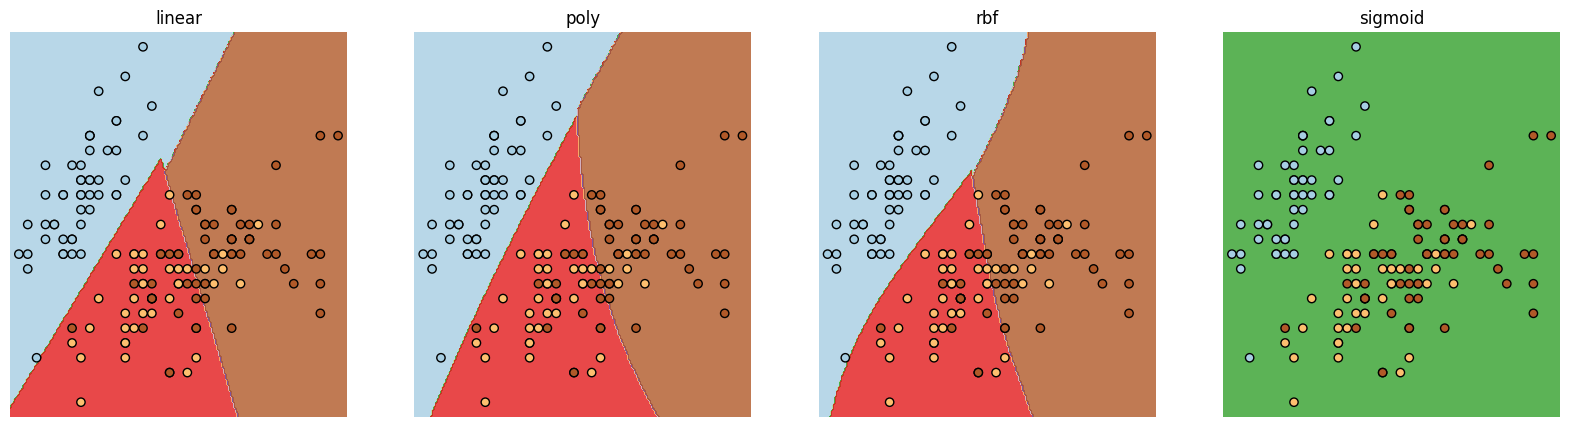

In [36]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] #son 4 fronteras de desición

_, axes = plt.subplots(1,4, figsize = (20,5)) #4 gráficas

# fit the model
for i,kernel in enumerate(kernels) :

  clf = SVC(kernel = kernel , gamma = 1, degree = 2)
  clf.fit( X , y )

  Boundaries(clf,X, y,ax=axes[i])
  axes[i].set_title(kernel)
  axes[i].set_axis_off()
plt.show()

In [43]:
 # Load the fruits dataset
fruit_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/machine_learning/Tools/fruits_data_ext.csv', index_col=0)
fruit_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [44]:
fruits_x = fruit_data[['width','height']]  # Features. We'll pick 2
fruits_y = fruit_data[['fruit_label']]  # Labels

# Convert everything to a np array
fruits_x, fruits_y = np.asarray(fruits_x), np.asarray(fruits_y).ravel()

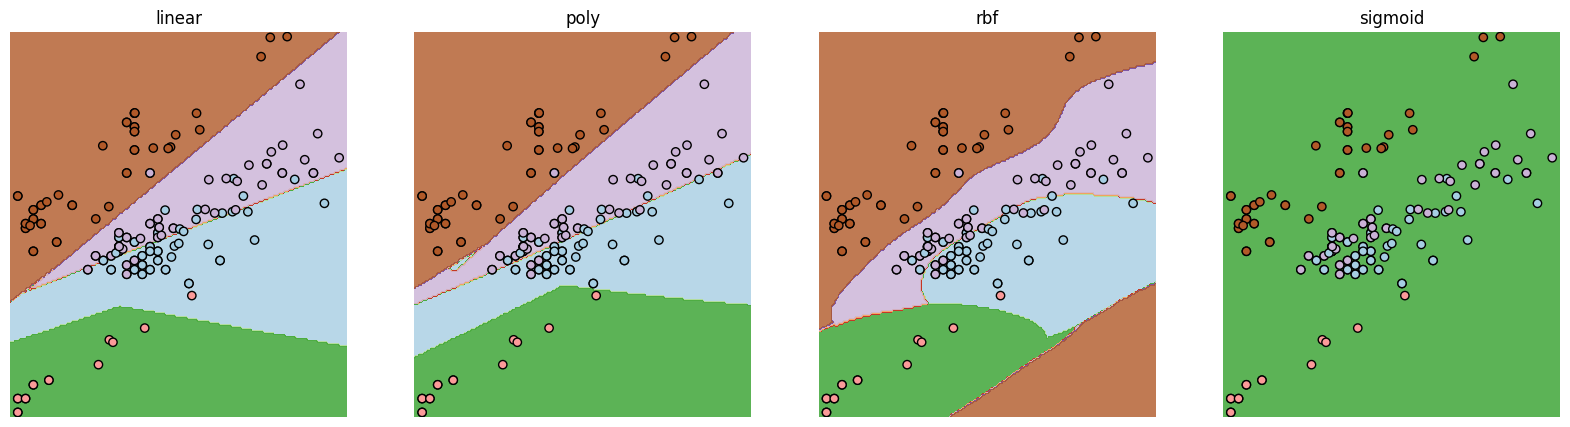

In [49]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] #son 4 fronteras de desición

_, axes = plt.subplots(1,4, figsize = (20,5)) #4 gráficas

# fit the model
for i,kernel in enumerate(kernels) :

  clf = SVC(kernel = kernel , gamma = 1, degree = 2)
  clf.fit( fruits_x , fruits_y)

  Boundaries(clf,fruits_x, fruits_y,ax=axes[i])
  axes[i].set_title(kernel)
  axes[i].set_axis_off()
plt.show()